In [ ]:
# Install Dependencies
!git clone https://github.com/decile-team/spear.git
%cd spear
!pip install decile-spear
!pip install stanza

Cloning into 'spear'...
remote: Enumerating objects: 2965, done.
remote: Counting objects: 100% (236/236), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 2965 (delta 185), reused 174 (delta 174), pack-reused 2729
Receiving objects: 100% (2965/2965), 461.42 MiB | 19.00 MiB/s, done.
Resolving deltas: 100% (1629/1629), done.
Updating files: 100% (237/237), done.
/content/spear
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.7/74.7 kB 6.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.5/802.5 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 18.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=2ae883cdefeb83ceb16af8860d6baa5bce3b

In [ ]:
class ClassLabels(enum.Enum):
    LEX = 1
    NOLEX = 0

In [ ]:
stanza.download('en') 
nlp = stanza.Pipeline() 

INFO:stanza:Downloading default packages for language: en (English) ...


INFO:stanza:Finished downloading models and saved to /root/stanza_resources.
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: en (English):
| Processor    | Package   |
----------------------------
| tokenize     | combined  |
| pos          | combined  |
| lemma        | combined  |
| constituency | wsj       |
| depparse     | combined  |
| sentiment    | sstplus   |
| ner          | ontonotes |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


In [ ]:
# Labelling Functions

@preprocessor(name = "LOWER_CASE")
def convert_to_lower(x):
    return x.lower().strip()

@labeling_function(pre=[convert_to_lower], label=ClassLabels.LEX)
def LF1(c,**kwargs):
  doc = nlp(c)
  for sent in doc.sentences:
    for word in sent.words:
      if(word.upos == 'NOUN'):
        return ClassLabels.LEX
  return ABSTAIN

@labeling_function(pre=[convert_to_lower], label=ClassLabels.NOLEX)
def LF2(c,**kwargs):
  doc = nlp(c)
  for sent in doc.sentences:
    for word in sent.words:
      if(word.upos == 'SYM'):
        return ClassLabels.NOLEX
  return ABSTAIN

@labeling_function(pre=[convert_to_lower], label=ClassLabels.NOLEX)
def LF3(c,**kwargs):
  doc = nlp(c)
  for sent in doc.sentences:
    for word in sent.words:
      if(word.upos == 'NOUN'):
        return ABSTAIN
  return ClassLabels.NOLEX

@labeling_function(pre=[convert_to_lower], label=ClassLabels.LEX)
def LF4(c,**kwargs):
  doc = nlp(c)
  for sent in doc.sentences:
    for word in sent.words:
      if(word.upos == 'VERB'):
        return ClassLabels.LEX
  return ABSTAIN

In [ ]:
LFS = [LF1, LF2, LF3, LF4]
rules = LFSet("POS_LF")
rules.add_lf_list(LFS)

In [ ]:
# Load Data
with open('data.csv','r') as f:
  f1 = csv.reader(f)
  li = list(f1)
X,Y = li[0], li[1]

Y_ = []
for i in Y:
  if(i == 'LEX'):
    Y_.append(1)
  else:
    Y_.append(0)
Y_ = np.array(Y_)

X1, Y1 = [], []
n = 500
for i in range(len(X)):
  if(Y_[i] == 1 and n>=0):
    X1.append(X[i])
    Y1.append(Y_[i])
    n -= 1
  if(Y_[i] == 0):
    X1.append(X[i])
    Y1.append(Y_[i])

In [ ]:
path_to_json = 'pos.json'
T_path_pkl = 'pos.pkl'

In [ ]:
sms_noisy_labels = PreLabels(name="pos",
                               data=np.array(X1),
                               gold_labels=np.array(Y1),
                               rules=rules,
                               labels_enum=ClassLabels,
                               num_classes=2)
sms_noisy_labels.generate_pickle(T_path_pkl)
sms_noisy_labels.generate_json(path_json) 

100%|██████████| 819/819 [11:25<00:00,  1.19it/s]


Y is  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 1 1 1 1 1 1 1 1 

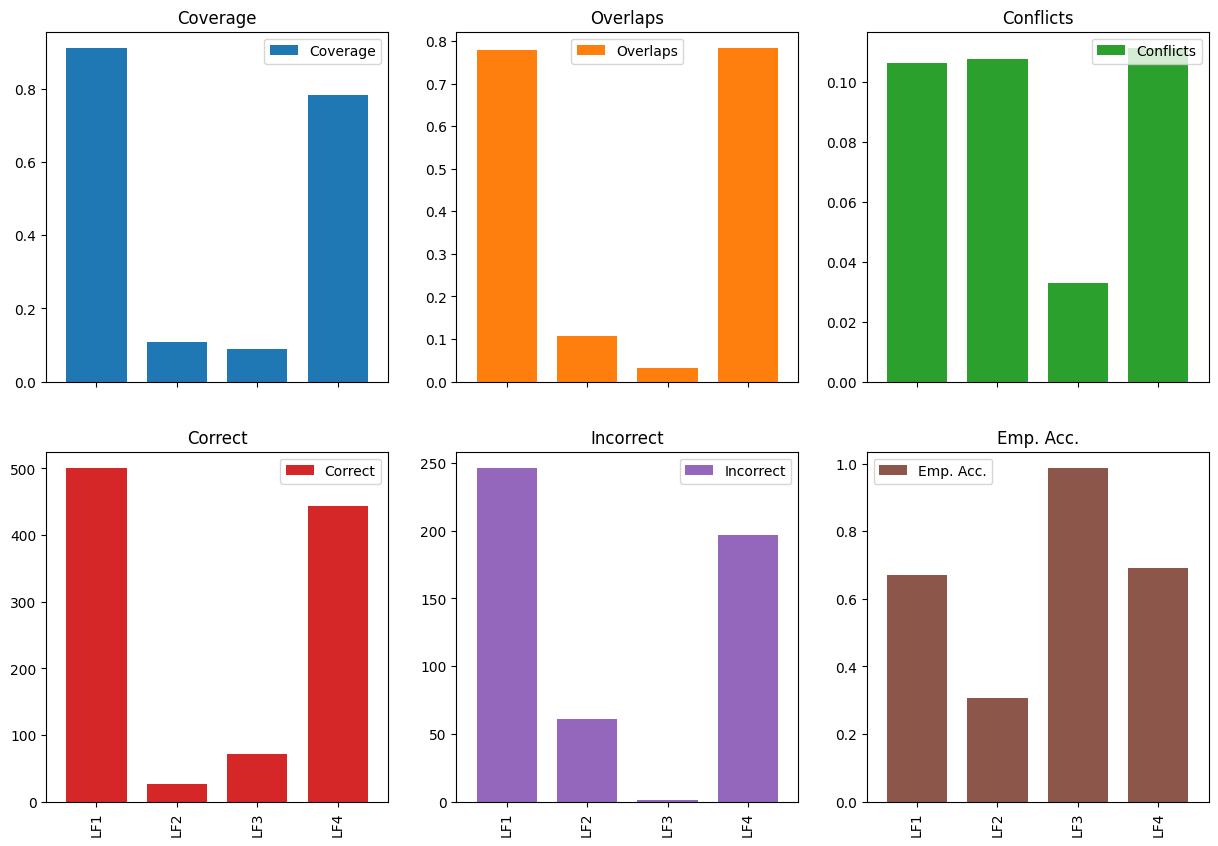

,Polarity,Coverage,Overlaps,Conflicts,Correct,Incorrect,Emp. Acc.
LF1,"[-1.0, 0.0]",0.910867,0.777778,0.106227,500,246,0.670241
LF2,"[-1.0, 1.0]",0.107448,0.107448,0.107448,27,61,0.306818
LF3,"[-1.0, 1.0]",0.089133,0.032967,0.032967,72,1,0.986301
LF4,"[-1.0, 0.0]",0.782662,0.782662,0.111111,444,197,0.692668


In [ ]:
analyse = sms_noisy_labels.analyse_lfs(plot=True)
result = analyse.head()
display(result)